In [1]:
import matplotlib.pyplot as plt
import cv2
import easyocr
from pylab import rcParams
from IPython.display import Image
import numpy as np
from PIL import Image


In [2]:
import os
import glob

# Directory containing the images
directory = '' # Enter the path of the train directory

# png file extension
extension = 'png'

# loop to iterate through the files
image_paths = []    

for file_path in glob.glob(os.path.join(directory, f'*.{extension}')):
    image_paths.append(file_path)

# list of image paths
print(image_paths)

['C:/Users/bhave/OneDrive/Desktop/Captcha/data/train\\5np4m.png', 'C:/Users/bhave/OneDrive/Desktop/Captcha/data/train\\5p3mm.png', 'C:/Users/bhave/OneDrive/Desktop/Captcha/data/train\\5pm6b.png', 'C:/Users/bhave/OneDrive/Desktop/Captcha/data/train\\5wddw.png', 'C:/Users/bhave/OneDrive/Desktop/Captcha/data/train\\5x5nx.png', 'C:/Users/bhave/OneDrive/Desktop/Captcha/data/train\\5x7x5.png', 'C:/Users/bhave/OneDrive/Desktop/Captcha/data/train\\5xd2e.png', 'C:/Users/bhave/OneDrive/Desktop/Captcha/data/train\\5ywwf.png', 'C:/Users/bhave/OneDrive/Desktop/Captcha/data/train\\62nb3.png', 'C:/Users/bhave/OneDrive/Desktop/Captcha/data/train\\63pxe.png', 'C:/Users/bhave/OneDrive/Desktop/Captcha/data/train\\646x8.png', 'C:/Users/bhave/OneDrive/Desktop/Captcha/data/train\\64b3p.png', 'C:/Users/bhave/OneDrive/Desktop/Captcha/data/train\\64m82.png', 'C:/Users/bhave/OneDrive/Desktop/Captcha/data/train\\658xe.png', 'C:/Users/bhave/OneDrive/Desktop/Captcha/data/train\\65ebm.png', 'C:/Users/bhave/OneDrive

In [3]:
#Train label
label=[]
for i in image_paths:
    label.append(i[-9:-4])

print(label)

['5np4m', '5p3mm', '5pm6b', '5wddw', '5x5nx', '5x7x5', '5xd2e', '5ywwf', '62nb3', '63pxe', '646x8', '64b3p', '64m82', '658xe', '65ebm', '65m85', '662bw', '664dn', '664nf', '66wp5', '675p3', '677g3', '678w3', '6825y', '68wfd', '68x48', '6bnnm', '6bxwg', '6c3p5', '6cm6m', '6cwxe', '6dd2y', '6e554', '6e6pn', '6ecbn', '6end3', '6f2yc', '6f857', '6fg8c', '6fgdw', '6fn84', '6g45w', '6ge3p', '6gnm3', '6mege', '6mn8n', '6mygb', '6n5fd', '6n6gg', '6ng6n', '6ng6w', '6p2ge', '6p7gx', '6pwcn', '6wb76', '6wnyc', '6xen4', '6xxdx', '6ydyp', '728n8', '72m6f', '74eyg', '75pfw', '7634y', '76353', '76n7p', '76nxn', '78eec', '7b4bm', '7bb7b', '7cdge', '7cgym', '7dwx4', '7dxbd', '7dyww', '7e2y7', '7f8b3', '7fde7', '7g3nf', '7gce6', '7gmf3', '7gnge', '7gp47', '7m8px', '7mgmf', '7nnnx', '7p852', '7pcd7', '7pn5g', '7wn74', '7wnpm', '7wyp4', '7xcyd', '7xd5m', '7yf62', '823p2', '82fx2', '832f3', '84w7x', '85622', '85dxn', '865wm', '87d4c', '87nym', '88bgx', '88y52', '8b735', '8bbm4', '8bbw8', '8c23f', '8c2wy', 

In [4]:
reader = easyocr.Reader(['en'])  #Optiocal Character Recognition

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [5]:
#Processing the image and adding a border around the image for easier recognition

result = []
for i in image_paths:
    
    og=cv2.imread(i)
    _, binary_img = cv2.threshold(og, 94, 250, cv2.THRESH_BINARY)

    kernel = np.ones((2,2),np.uint8)
    eroded_image = cv2.erode(binary_img, kernel, iterations=1)

    kernel2 = np.ones((4,4), np.uint8)
    closed_image = cv2.morphologyEx(eroded_image, cv2.MORPH_CLOSE, kernel2)

    # Ensuring the image is in the correct format
    closed_image = np.array(closed_image)
    old_im = Image.fromarray(closed_image)
    old_size = old_im.size

    # border size
    border_size = 20 

    # New image size with the border
    new_width = old_size[0] + 2 * border_size
    new_height = old_size[1] + 2 * border_size

    new_im = Image.new("RGB", (new_width, new_height), (255, 255, 255))  # white border

    # coordinates to append border
    left = border_size
    upper = border_size
    right = left + old_size[0]
    lower = upper + old_size[1]

    box = (left, upper, right, lower)
    new_im.paste(old_im, box)

    new_im = np.array(new_im)

    result.append(new_im)


C:\Users\bhave\AppData\Local\Temp\ipykernel_14848\3982228266.py:40: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,1)


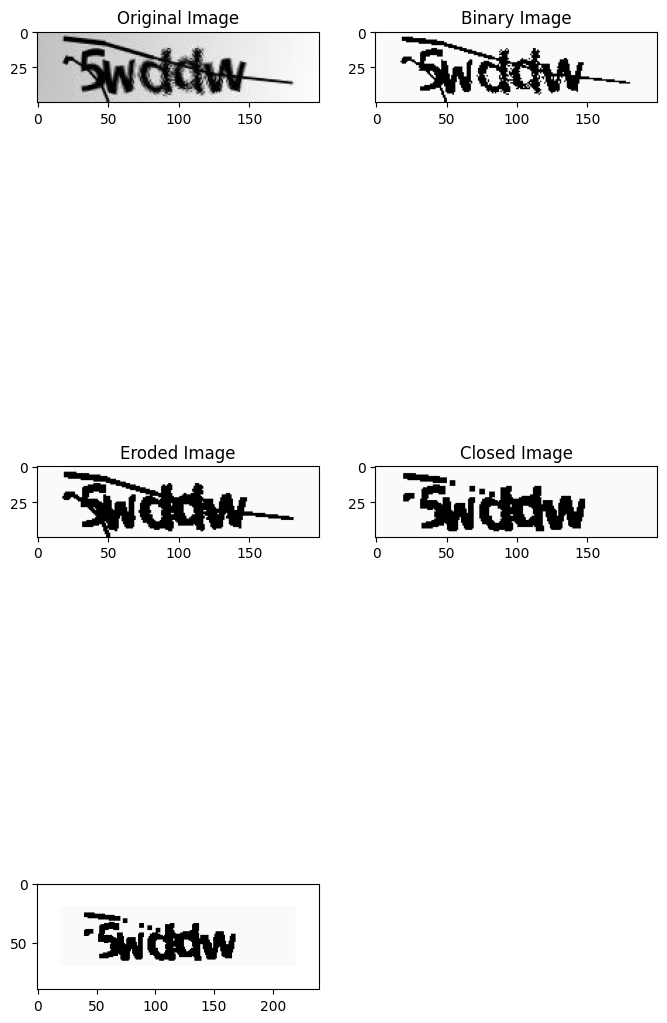

In [30]:
#EXAMPLE

og=cv2.imread(r'') #Enter the path of any image from train directory
_, binary_img = cv2.threshold(og, 94, 250, cv2.THRESH_BINARY)

kernel = np.ones((2,2),np.uint8)
eroded_image = cv2.erode(binary_img, kernel, iterations=1)

kernel2 = np.ones((4,4), np.uint8)
closed_image = cv2.morphologyEx(eroded_image, cv2.MORPH_CLOSE, kernel2)

closed_image = np.array(closed_image)
old_im = Image.fromarray(closed_image)
old_size = old_im.size

# Define the desired border size
border_size = 20 

# New image size with the border
new_width = old_size[0] + 2 * border_size
new_height = old_size[1] + 2 * border_size

new_im = Image.new("RGB", (new_width, new_height), (255, 255, 255))  # Create a white background image

# Calculate the coordinates to append border
left = border_size
upper = border_size
right = left + old_size[0]
lower = upper + old_size[1]

box = (left, upper, right, lower)
new_im.paste(old_im, box)

new_im = np.array(new_im)

plt.imshow(new_im)



plt.subplot(3,2,1)
plt.imshow(og)
plt.title('Original Image')
plt.subplot(3,2,2)
plt.imshow(binary_img)
plt.title('Binary Image')
plt.subplot(3,2,3)
plt.imshow(eroded_image)
plt.title('Eroded Image')
plt.subplot(3,2,4)
plt.imshow(closed_image)
plt.title('Closed Image')
plt.subplot(3,2,5)
plt.imshow(new_im)


In [9]:
# fetching the final output
final_output=[]

for i in result:
    final_output.append(reader.readtext(i))

In [21]:
final_output

[[([[32, 19], [180, 19], [180, 79], [32, 79]], 'Xp4m', 0.09584619104862213)],
 [([[34, 26], [162, 26], [162, 74], [34, 74]], '95p3um', 0.2179514033552708)],
 [([[32, 26], [176, 26], [176, 76], [32, 76]], 'Ephob', 0.09649102420109372)],
 [([[28, 16], [179, 16], [179, 80], [28, 80]], 'Eddw', 0.19176998734474182)],
 [([[36, 20], [160, 20], [160, 72], [36, 72]], '5xSnX', 0.10889917130321948)],
 [([[34, 27], [162, 27], [162, 70], [34, 70]], '55x7x5', 0.4995037680533469)],
 [([[33, 25], [162, 25], [162, 73], [33, 73]], 'TSxd2e', 0.31887566273260143)],
 [([[152, 28], [176, 28], [176, 66], [152, 66]], 'f', 0.3672667105075931),
  ([[40.980558500954125, 13.087239305533913],
    [162.76, 29.32],
    [153.01944149904588, 82.91276069446609],
    [31.240000000000002, 67.68]],
   'Ivww',
   0.2654683589935303)],
 [([[30, 17], [167, 17], [167, 78], [30, 78]], '163b3', 0.3279614020013449)],
 [([[34, 22], [166, 22], [166, 74], [34, 74]], "'63pxe", 0.3660150745472151)],
 [([[34, 22], [170, 22], [170, 72]

In [11]:
#Retrieving string format from the output
final=[]
for i in range(0,412):
    final.append(final_output[i][0][1])

In [12]:
final

['Xp4m',
 '95p3um',
 'Ephob',
 'Eddw',
 '5xSnX',
 '55x7x5',
 'TSxd2e',
 'f',
 '163b3',
 "'63pxe",
 'X46*8',
 '76463p',
 '64m82',
 "'658xe",
 'i652hm',
 'k651185',
 'G62tw',
 '664dn',
 '{664nf',
 'i66wp5',
 '76753',
 '577g3',
 "'67873",
 '6825v',
 '€ewfd',
 "'68x48",
 'Sbrnm',
 'Tbxwg',
 'f2325',
 'Rch6m',
 '6wxe',
 'Sodd?y',
 '6e554',
 'Ge6r',
 'Tecbn',
 '"\'6end3',
 '~6f2yc',
 '6f857',
 '{Gfg8c',
 'dfgdw',
 '%6f084',
 '5945w',
 'Jore?p',
 '"610m3',
 'Spege',
 "'n8n",
 '"G+nqb',
 "'Gnsfd",
 '~noga',
 'TngGn',
 'Tngbw',
 'iep2g@',
 '6p74*',
 'zepwcn',
 '6wb7',
 'ewnyc',
 '"Gxen4',
 'Oxxdr',
 '"evdlyp',
 "'z8n5",
 '7rsf',
 'Reyg',
 'r5pfw',
 '7634v',
 '77635}',
 'L6n7p',
 '76nKn',
 'I78ec',
 '7Abm',
 '=bbt',
 'Zede',
 'cgym',
 'Zuwx4',
 'Zdxbd',
 "'{dNyww",
 'Rezy7',
 '7f8b3',
 '#ffdke7',
 'zqunf',
 'Agce6',
 '7qf3',
 'Ygnge',
 '7p47',
 "'Anepx",
 '7nf',
 '"Zmx',
 '7p852',
 'spcdz',
 '~pn5y',
 '7wn74',
 'xpm',
 '7TYMA',
 "'Txcyd",
 'i7xdSm',
 '4f6z',
 '82p2',
 '"82FK2',
 '832f3',
 '84wTx

In [13]:
#Function to keep only alphanumeric characters
def keep_alphanumeric_chars(input_string):  
    result = ""

    for char in input_string:
        if char.isalnum():

            result += char
    return result

In [20]:
#String after removing the unecessary characters
out = []
for i in final:
    out.append(keep_alphanumeric_chars(i))

In [15]:
out

['Xp4m',
 '95p3um',
 'Ephob',
 'Eddw',
 '5xSnX',
 '55x7x5',
 'TSxd2e',
 'f',
 '163b3',
 '63pxe',
 'X468',
 '76463p',
 '64m82',
 '658xe',
 'i652hm',
 'k651185',
 'G62tw',
 '664dn',
 '664nf',
 'i66wp5',
 '76753',
 '577g3',
 '67873',
 '6825v',
 'ewfd',
 '68x48',
 'Sbrnm',
 'Tbxwg',
 'f2325',
 'Rch6m',
 '6wxe',
 'Soddy',
 '6e554',
 'Ge6r',
 'Tecbn',
 '6end3',
 '6f2yc',
 '6f857',
 'Gfg8c',
 'dfgdw',
 '6f084',
 '5945w',
 'Jorep',
 '610m3',
 'Spege',
 'n8n',
 'Gnqb',
 'Gnsfd',
 'noga',
 'TngGn',
 'Tngbw',
 'iep2g',
 '6p74',
 'zepwcn',
 '6wb7',
 'ewnyc',
 'Gxen4',
 'Oxxdr',
 'evdlyp',
 'z8n5',
 '7rsf',
 'Reyg',
 'r5pfw',
 '7634v',
 '77635',
 'L6n7p',
 '76nKn',
 'I78ec',
 '7Abm',
 'bbt',
 'Zede',
 'cgym',
 'Zuwx4',
 'Zdxbd',
 'dNyww',
 'Rezy7',
 '7f8b3',
 'ffdke7',
 'zqunf',
 'Agce6',
 '7qf3',
 'Ygnge',
 '7p47',
 'Anepx',
 '7nf',
 'Zmx',
 '7p852',
 'spcdz',
 'pn5y',
 '7wn74',
 'xpm',
 '7TYMA',
 'Txcyd',
 'i7xdSm',
 '4f6z',
 '82p2',
 '82FK2',
 '832f3',
 '84wTx',
 '85522',
 'B5ttrn',
 '865wm',
 '

In [16]:
#Function to find similarity between output and label
def levenshtein_distance(s1, s2):
    m, n = len(s1), len(s2)
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(m + 1):
        dp[i][0] = i
    for j in range(n + 1):
        dp[0][j] = j

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            cost = 0 if s1[i - 1] == s2[j - 1] else 1
            dp[i][j] = min(
                dp[i - 1][j] + 1,        
                dp[i][j - 1] + 1,        
                dp[i - 1][j - 1] + cost
            )

    return dp[m][n]

def string_similarity_percentage(s1, s2):
    max_length = max(len(s1), len(s2))
    distance = levenshtein_distance(s1, s2)
    similarity = 1 - (distance / max_length)
    return similarity * 100


In [22]:
count = 0
for i in range (0,412):
    count+=string_similarity_percentage(label[i], out[i])

print("Accuracy:", count/412)


Accuracy: 62.751964863615356
